<a href="https://colab.research.google.com/github/sophia172/XVI_UCM_Modelling_Week/blob/main/KNN_exercise_UCM_modelling_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up environment

In [ ]:
import sys
print('The current python environment is located at %s'%sys.prefix)

# ! pip install tensorflow==2.5

The current python environment is located at /usr


In [2]:
# Main
import pandas as pd
import numpy as np
import glob
import os
import time
import re

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Save Variables
import pickle

# Data Prep
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.cluster import DBSCAN

# Algos

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

#### Example dll directory for GPU running with tensorflow version below 2.6
#
# os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
# os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/cuda/bin")
####
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model

print('TensorFlow version is %s'%tf.version.GIT_VERSION)
print('The GPU for the machine learning exercise is %s'%tf.config.list_physical_devices('GPU'))

import platform
if platform.system() == 'Linux':
  # code is running on google colab
  data_folder = 'sample_data'
else:
  # code is running on windows
    HOME = os.path.expanduser("~")
    google_drive = os.path.join(HOME, 'Google_Drive_path') # Fill in yourfolder name
    models_folder = os.path.join('local_drive_path') # Fill in your folder name
    






TensorFlow version is v2.8.0-0-g3f878cff5b6
The GPU for the machine learning exercise is []


# CONSTANT variable


In [5]:
DATA_TYPE = ['train', 'val', 'test', 'hold']

## Load P162 data

In [10]:
def generate_input_data(i):
	data_df = pd.read_csv('dataset_%d.csv' % i)

	X_train = data_df[data_df.train_test == 'train'].iloc[:, 1:]
	X_val = data_df[data_df.train_test == 'validation'].iloc[:, 1:]
	X_test = data_df[data_df.train_test == 'test'].iloc[:, 1:]
	X_hold = data_df[data_df.train_test == 'hold'].iloc[:, 1:]

	X_train_tf = X_train.iloc[:, 0:100].to_numpy()
	X_val_tf = X_val.iloc[:, 0:100].to_numpy()
	X_test_tf = X_test.iloc[:, 0:100].to_numpy()
	X_hold_tf = X_hold.iloc[:, 0:100].to_numpy()

	y_train_tf = X_train.label.astype(int).to_numpy()
	y_val_tf = X_val.label.astype(int).to_numpy()
	y_test_tf = X_test.label.astype(int).to_numpy()
	y_hold_tf = X_hold.label.astype(int).to_numpy()

	X_train_tf_combined = np.hstack((X_train_tf, y_train_tf.reshape((-1, 1))))
	X_val_tf_combined = np.hstack((X_val_tf, y_val_tf.reshape((-1, 1))))
	X_test_tf_combined = np.hstack((X_test_tf, y_test_tf.reshape((-1, 1))))
	X_hold_tf_combined = np.hstack((X_hold_tf, y_hold_tf.reshape((-1, 1))))

	data = {}
	data['X_train_vae'] = X_train_tf_combined
	data['X_val_vae'] = X_val_tf_combined
	data['X_test_vae'] = X_test_tf_combined
	data['X_hold_vae'] = X_hold_tf_combined

	data['X_train_flat'] = X_train_tf
	data['X_val_flat'] = X_val_tf
	data['X_test_flat'] = X_test_tf
	data['X_hold_flat'] = X_hold_tf

	data['y_train'] = y_train_tf
	data['y_val'] = y_val_tf
	data['y_test'] = y_test_tf
	data['y_hold'] = y_hold_tf

	return data


In [15]:
generate_input_data(32)

{'X_hold_flat': array([[0.01960784, 0.01960784, 0.01960784, ..., 0.69387755, 0.69387755,
         0.68877551],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.68367347, 0.68367347,
         0.68367347],
        [0.01960784, 0.01960784, 0.02533615, ..., 0.67073413, 0.67346939,
         0.67346939],
        ...,
        [0.01960784, 0.01960784, 0.01960784, ..., 0.69387755, 0.69387755,
         0.69387755],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.69387755, 0.69387755,
         0.69387755],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.69387755, 0.69387755,
         0.69387755]]),
 'X_hold_vae': array([[0.01960784, 0.01960784, 0.01960784, ..., 0.69387755, 0.68877551,
         1.        ],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.68367347, 0.68367347,
         1.        ],
        [0.01960784, 0.01960784, 0.02533615, ..., 0.67346939, 0.67346939,
         1.        ],
        ...,
        [0.01960784, 0.01960784, 0.01960784, ..., 0.69387755, 0.69387755,
     

# Use KNN 

## on 3 Principle components from LDA

In [ ]:

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd")



In [ ]:

folder = os.path.join(google_drive,'ML','models','P170')
variable_path = os.path.join(folder, 'lda_empty')

with open(variable_path, 'wb') as file:
  pickle.dump(lda, file)

In [ ]:
lda.fit(X_train_reshaped, y_train)

In [ ]:
X_test_lda = lda.transform(X_test_reshaped)
X_val_lda = lda.transform(X_val_reshaped)
X_train_lda = lda.transform(X_train_reshaped)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=15, weights="distance")


In [ ]:

folder = os.path.join(google_drive,'ML','models','P170')
variable_path = os.path.join(folder, 'knn_empty')

with open(variable_path, 'wb') as file:
  pickle.dump(, file)

SyntaxError: invalid syntax (Temp/ipykernel_23696/1833097144.py, line 6)

In [ ]:
knn.fit(X_val_lda, y_val)

In [ ]:
knn.score(X_train_lda, y_train)

0.9642188704172631

In [ ]:
knn.score(X_val_lda, y_val)

1.0

In [ ]:
knn.score(X_test_lda, y_test)

0.8720249966759739

In [ ]:

predicted_result = knn.predict(X_test_lda)
accuracy_chart = dict()
accuracy_chart['x00'] = 0
accuracy_chart['x01'] = 0
accuracy_chart['x02'] = 0
accuracy_chart['x03'] = 0
accuracy_chart['x10'] = 0
accuracy_chart['x11'] = 0
accuracy_chart['x12'] = 0
accuracy_chart['x13'] = 0
accuracy_chart['x20'] = 0
accuracy_chart['x21'] = 0
accuracy_chart['x22'] = 0
accuracy_chart['x23'] = 0
accuracy_chart['x30'] = 0
accuracy_chart['x31'] = 0
accuracy_chart['x32'] = 0
accuracy_chart['x33'] = 0
for i, value in enumerate(predicted_result):
  real_value = str(int(y_test.ravel()[i]))
  predicted_value = str(int(value))
  accuracy_chart['x%s%s'%(real_value, predicted_value)] += 1


In [ ]:
print(accuracy_chart)

{'x00': 3632, 'x01': 0, 'x02': 180, 'x03': 160, 'x10': 276, 'x11': 3892, 'x12': 82, 'x13': 44, 'x20': 2, 'x21': 0, 'x22': 2470, 'x23': 12, 'x30': 70, 'x31': 40, 'x32': 0, 'x33': 3450}


|      |              | prediction |       |              |             |
|------|--------------|------------|-------|--------------|-------------|
|      |              | index_bend | shoot | middle_flick | index_flick |
| real | index_bend   | 3926       | 0     | 86           | 222         |
|      | shoot        | 23         | 3803  | 0            | 72          |
|      | middle_flick | 8          | 0     | 2496         | 0           |
|      | index_flick  | 78         | 16    | 24           | 3144        |

#### test accuracy and computing time

In [ ]:

start_time = time.time()
X_test_reshaped_1 = X_test_reshaped[0]
X_test_lda_1 = lda.transform([X_test_reshaped_1])
knn.predict(X_test_lda_1)
print('The computing time is ', (time.time() - start_time))

The computing time is  0.0033681392669677734


In [ ]:
total_num = y_test.shape[0]
correct_prediction = np.sum(knn.predict(X_test_lda) == y_test.ravel())
print('Accuracy is ', correct_prediction/total_num)

Accuracy is  0.9619369693481077


### Compare Num_neighbours in KNN and visulise (metric: euclidean)

In [ ]:
scores = []
num_nn = range(2,300)
# lda = LinearDiscriminantAnalysis(n_co[mponents=3, solver="svd")
# lda.fit(X_train_reshaped, y_train.ravel())
# X_test_lda= lda.transform(X_test_reshaped)
# X_train_lda = lda.transform(X_train_reshaped)

for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train_lda, y_train.ravel())
    scores.append(knn.score(X_train_lda, y_train.ravel()))

The maximum score is  0.9995031584924409


Text(0, 0.5, 'Accuracy from KNN with 3 LDA PCs')

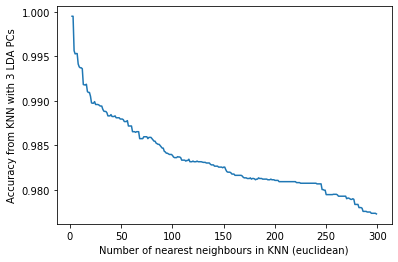

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (euclidean)")
plt.ylabel("Accuracy from KNN with 3 LDA PCs")

### Compare Num_neighbours in KNN and visulise (metric: manhattan)

In [ ]:
scores = []
num_nn = range(2,300)
# lda = LinearDiscriminantAnalysis(n_components=3, solver="svd")
# lda.fit(X_train_reshaped, y_train.ravel())
# X_test_lda= lda.transform(X_test_reshaped)
# X_train_lda = lda.transform(X_train_reshaped)

for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan", n_jobs=-1)
    knn.fit(X_train_lda, y_train.ravel())
    scores.append(knn.score(X_test_lda, y_test.ravel()))

The maximum score is  0.9484276729559749


Text(0, 0.5, 'Accuracy from KNN with 3 LDA PCs')

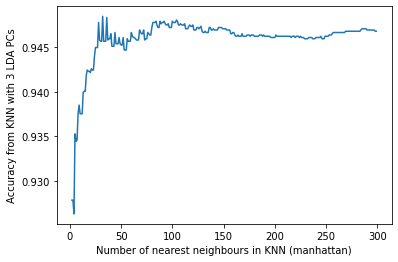

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (manhattan)")
plt.ylabel("Accuracy from KNN with 3 LDA PCs")

### Compare Num_neighbours in KNN and visulise (metric: chebyshev)

In [ ]:

scores = []
num_nn = range(2,300)
# lda = LinearDiscriminantAnalysis(n_components=3, solver="eigen")
# lda.fit(X_train_reshaped, y_train.ravel())
# X_test_lda= lda.transform(X_test_reshaped)
# X_train_lda = lda.transform(X_train_reshaped)

for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="chebyshev", n_jobs=-1)
    knn.fit(X_train_lda, y_train.ravel())
    scores.append(knn.score(X_test_lda, y_test.ravel()))

The maximum score is  0.9461914744933613


Text(0, 0.5, 'Accuracy from KNN with 3 LDA PCs')

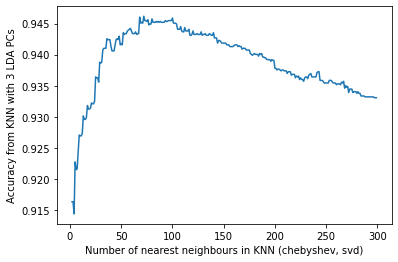

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (chebyshev, svd)")
plt.ylabel("Accuracy from KNN with 3 LDA PCs")

## on 3 Principle components from PCA

In [ ]:

pca = PCA(n_components=3)


In [ ]:

folder = os.path.join(google_drive,'ML','models','P170')
variable_path = os.path.join(folder, 'pca_empty')

with open(variable_path, 'wb') as file:
  pickle.dump(pca, file)

In [ ]:

pca.fit(X_train_reshaped)

In [ ]:

X_val_pca = pca.transform(X_val_reshaped)
X_test_pca = pca.transform(X_test_reshaped)
X_train_pca = pca.transform(X_train_reshaped)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15, weights="distance")
# 

In [ ]:
knn.fit(X_val_pca[:,:3], y_val)

In [ ]:
knn.score(X_train_pca, y_train)

0.8816470329186392

In [ ]:
knn.score(X_val_pca, y_val)

1.0

In [ ]:
knn.score(X_test_pca, y_test)

0.953064752027656

### Compare Num_PCs and visulise

In [ ]:
scores = []
num_pc = range(2,11)

for i in num_pc:
    pca = PCA(n_components=i)
    pca.fit(X_train_reshaped)
    X_test_pca = pca.transform(X_test_reshaped)
    X_train_pca = pca.transform(X_train_reshaped)
    knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
    knn.fit(X_train_pca, y_train)
    scores.append(knn.score(X_test_pca, y_test))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_pc, scores)
plt.xlabel("Number of Principle Components from PCA")
plt.ylabel("Accuracy from KNN with 5 nns and 'distance' weight")

### Compare Num_neighbours in KNN and visulise

In [ ]:
scores = []
num_nn = range(2,300)
# pca = PCA(n_components=3)
# pca.fit(X_train_reshaped)
# X_test_pca = pca.transform(X_test_reshaped)
# X_train_pca = pca.transform(X_train_reshaped)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean", n_jobs=-1)
    knn.fit(X_train_pca, y_train.ravel())
    scores.append(knn.score(X_test_pca, y_test.ravel()))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (euclidean)")
plt.ylabel("Accuracy from KNN with 3 PCs")

In [ ]:
scores = []
num_nn = range(2,300)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan", n_jobs=-1)
    knn.fit(X_train_pca, y_train.ravel())
    scores.append(knn.score(X_test_pca, y_test.ravel()))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (manhattan)")
plt.ylabel("Accuracy from KNN with 3 PCs")

In [ ]:
scores = []
num_nn = range(2,300)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="chebyshev", n_jobs=-1)
    knn.fit(X_train_pca, y_train.ravel())
    scores.append(knn.score(X_test_pca, y_test.ravel()))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (chebyshev)")
plt.ylabel("Accuracy from KNN with 3 PCs")

In [ ]:
model_folder = os.path.join(google_drive, 'ML', 'models', 'P78')
knn_path = os.path.join(model_folder,'lda_knn')
with open(knn_path, 'wb') as file:
    # Call load method to deserialze
    dataset = pickle.dump(knn,file)

In [ ]:
(25,1) + (3,)

(25, 1, 3)

## on N Principle components from PCA , pick sequence P1>P2>P3>P9>P7>P4

In [ ]:

pca = PCA(n_components='mle')
pca.fit(X_train_reshaped)


PCA(n_components='mle')

In [ ]:
X_test_pca = pca.transform(X_test_reshaped)
X_train_pca = pca.transform(X_train_reshaped)


In [ ]:

X_train_pca5 = np.hstack((X_train_pca[:,:3], X_train_pca[:,8].reshape(-1,1), X_train_pca[:,6].reshape(-1,1)))
X_test_pca5 = np.hstack((X_test_pca[:,:3], X_test_pca[:,8].reshape(-1,1), X_test_pca[:,6].reshape(-1,1)))

In [ ]:

X_train_pca4 = np.hstack((X_train_pca[:,:3], X_train_pca[:,8].reshape(-1,1)))
X_test_pca4 = np.hstack((X_test_pca[:,:3], X_test_pca[:,8].reshape(-1,1)))

In [ ]:

X_train_pca3 = X_train_pca[:,:3]
X_test_pca3 = X_test_pca[:,:3]

### Compare the number of neighbours

In [ ]:

scores = []
num_nn = range(1,100)

for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance", metric="euclidean")
    knn.fit(X_train_pca5, y_train.ravel())
    scores.append(knn.score(X_test_pca5, y_test.ravel()))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (euclidean)")
plt.ylabel("Accuracy from KNN with 5 PCs")

In [ ]:
scores = []
num_nn = range(1,100)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance", metric="manhattan")
    knn.fit(X_train_pca5, y_train.ravel())
    scores.append(knn.score(X_test_pca5, y_test.ravel()))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (manhattan)")
plt.ylabel("Accuracy from KNN with 5 PCs")

In [ ]:
scores = []
num_nn = range(1,100)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance", metric="chebyshev")
    knn.fit(X_train_pca5, y_train.ravel())
    scores.append(knn.score(X_test_pca5, y_test.ravel()))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (chebyshev)")
plt.ylabel("Accuracy from KNN with 5 PCs")

## Visualisation for the best model. lda + knn 15/distance/Manhattan

In [ ]:
model_folder = os.path.join(google_drive, 'ML', 'models', 'P93')
os.mkdir(model_folder)
knn_path = os.path.join(model_folder,'lda_knn')
plot_path = os.path.join(os.path.dirname(knn_path),'knn_probability_testing_data.html')

knn = KNeighborsClassifier(n_neighbors=15, weights="distance", metric="manhattan")
knn.fit(X_train_lda, y_train.ravel())

mesh_size = 0.5
margin = 0

# We will use the iris data, which is included in px

df_train = pd.DataFrame(np.hstack((X_train_lda, y_train)),
                        columns=['pc1','pc2','pc3','label'])
df_test = pd.DataFrame(np.hstack((X_test_lda, y_test)),
                        columns=['pc1','pc2','pc3','label'])
df = df_train
# Create a mesh grid on which we will run our model
pc1_min, pc1_max = df.pc1.min() - margin, df.pc1.max() + margin
pc2_min, pc2_max = df.pc2.min() - margin, df.pc2.max() + margin
pc3_min, pc3_max = df.pc3.min() - margin, df.pc3.max() + margin
pc1range = np.arange(pc1_min, pc1_max, mesh_size)
pc2range = np.arange(pc2_min, pc2_max, mesh_size)
pc3range = np.arange(pc3_min, pc3_max, mesh_size)

ll, ww, hh = np.meshgrid(pc1range, pc2range, pc3range)

# Create classifier, run predictions on grid

Z = knn.predict(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
Z = Z.reshape(ll.shape)
proba = knn.predict_proba(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
proba = proba.reshape(ll.shape + (4,))
# Compute the confidence, which is the difference

diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))



fig = go.Figure(data=[go.Scatter3d(
    x=df_test.pc1,
    y=df_test.pc2,
    z=df_test.pc3,
    mode='markers',
    marker=dict(
        size=2,
        color=df_test.label,               # set color to an array/list of desired values
        line=dict(width=0.1),
        colorscale=['Blue','Red','Green','Orange'],   # choose a colorscale
    )
)])


df_mesh = pd.DataFrame(np.c_[ll.ravel(), ww.ravel(), hh.ravel(),diff.ravel()], columns=['ll','ww','hh','label'])

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,0].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Blues',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,1].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Reds',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,2].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Greens',
        
    )
)


fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,3].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Oranges',
        
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)
fig.write_html(plot_path)
fig.show()

## Visualisation for the best model. pca + knn 300/distance/Manhattan

In [ ]:
model_folder = os.path.join(google_drive, 'ML', 'models', 'P92')
os.mkdir(model_folder)
knn_path = os.path.join(model_folder,'pca_knn')
plot_path = os.path.join(os.path.dirname(knn_path),'knn_probability_testing_data.html')

knn = KNeighborsClassifier(n_neighbors=300, weights="distance", metric="manhattan")
knn.fit(X_train_pca, y_train.ravel())


mesh_size = 0.5
margin = 0

# We will use the iris data, which is included in px

df_train = pd.DataFrame(np.hstack((X_train_pca, y_train)),
                        columns=['pc1','pc2','pc3','label'])
df_test = pd.DataFrame(np.hstack((X_test_pca, y_test)),
                        columns=['pc1','pc2','pc3','label'])
df = df_train
# Create a mesh grid on which we will run our model
pc1_min, pc1_max = df.pc1.min() - margin, df.pc1.max() + margin
pc2_min, pc2_max = df.pc2.min() - margin, df.pc2.max() + margin
pc3_min, pc3_max = df.pc3.min() - margin, df.pc3.max() + margin
pc1range = np.arange(pc1_min, pc1_max, mesh_size)
pc2range = np.arange(pc2_min, pc2_max, mesh_size)
pc3range = np.arange(pc3_min, pc3_max, mesh_size)

ll, ww, hh = np.meshgrid(pc1range, pc2range, pc3range)

# Create classifier, run predictions on grid

Z = knn.predict(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
Z = Z.reshape(ll.shape)
proba = knn.predict_proba(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
proba = proba.reshape(ll.shape + (4,))
# Compute the confidence, which is the difference

diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))



fig = go.Figure(data=[go.Scatter3d(
    x=df_test.pc1,
    y=df_test.pc2,
    z=df_test.pc3,
    mode='markers',
    marker=dict(
        size=2,
        color=df_test.label,               # set color to an array/list of desired values
        line=dict(width=0.1),
        colorscale=['Blue','Red','Green','Orange'],   # choose a colorscale
    )
)])


df_mesh = pd.DataFrame(np.c_[ll.ravel(), ww.ravel(), hh.ravel(),diff.ravel()], columns=['ll','ww','hh','label'])

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,0].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Blues',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,1].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Reds',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,2].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Greens',
        
    )
)


fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,3].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Oranges',
        
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)
fig.write_html(plot_path)
fig.show()

# Run KNN on PCA to separate 0/3, 1, 2, Then run KNN on LDA to separate 0/3

## change label

## separate index_bend/index_flick with shoot and middle flick

In [ ]:

y_train_mix_label = y_train
y_train_mix_label[np.where(y_train_mix_label == 3)] = 0
y_test_mix_label = y_test
y_test_mix_label[np.where(y_test_mix_label == 3)] = 0

### Use PCA and KNN

In [ ]:

pca = PCA(n_components=3)
pca.fit(X_train_reshaped)


PCA(n_components=3)

In [ ]:
X_train_mix_label_pca = pca.transform(X_train_reshaped)
X_test_mix_label_pca = pca.transform(X_test_reshaped)

#### Visulized the PCA and KNN result:

In [ ]:

scores = []
num_nn = range(2,300)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan", n_jobs=-1)
    knn.fit(X_train_mix_label_pca, y_train_mix_label.ravel())
    scores.append(knn.score(X_test_mix_label_pca, y_test_mix_label.ravel()))

The maximum score is  0.9745287091667866


Text(0, 0.5, 'Accuracy from KNN with 3 PCs for 0/3,1, 2 label')

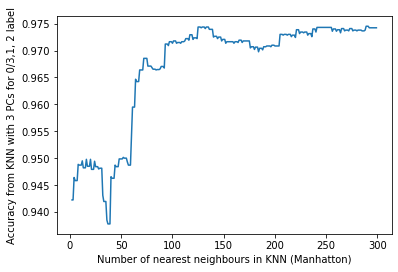

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (Manhatton)")
plt.ylabel("Accuracy from KNN with 3 PCs for 0/3,1, 2 label")

### Use LDA and KNN

In [ ]:

lda = LinearDiscriminantAnalysis(n_components=2, solver="svd")
lda.fit(X_train_reshaped, y_train_mix_label)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=2)

In [ ]:
X_test_mix_label_lda = lda.transform(X_test_reshaped)
X_train_mix_label_lda = lda.transform(X_train_reshaped)

#### Visulized the LDA and KNN result:

In [ ]:
scores = []
num_nn = range(1,500)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan", n_jobs=-1)
    knn.fit(X_train_mix_label_lda, y_train_mix_label.ravel())
    scores.append(knn.score(X_test_mix_label_lda, y_test_mix_label.ravel()))

KeyboardInterrupt: ignored

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (Manhatton)")
plt.ylabel("Accuracy from KNN with 2 LDA components for 0/3,1, 2 label")

#### Visualise the LDA separation

In [ ]:
# plot_path = os.path.join(os.path.dirname(pca_path),'PCA_kernal_1.html')


df = pd.DataFrame(np.hstack((X_test_mix_label_lda[:],y_test_mix_label)), columns=["PC1", "PC2", "label"])

fig = px.scatter(df, x="PC1", y="PC2", color="label")
fig.update_traces(marker=dict(size=5,
                              line=dict(width=0.5)),
                  selector=dict(mode='markers'))
# fig.write_html(plot_path)
fig.show()


#### Visualise a table of accuracy

In [ ]:
knn = KNeighborsClassifier(n_neighbors=600, metric="manhattan", n_jobs=-1)
knn.fit(X_train_mix_label_lda, y_train_mix_label.ravel())

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=600)

In [ ]:

predicted_result = knn.predict(X_test_mix_label_lda)
accuracy_chart = dict()
accuracy_chart['x00'] = 0
accuracy_chart['x01'] = 0
accuracy_chart['x02'] = 0
accuracy_chart['x10'] = 0
accuracy_chart['x11'] = 0
accuracy_chart['x12'] = 0
accuracy_chart['x20'] = 0
accuracy_chart['x21'] = 0
accuracy_chart['x22'] = 0
for i, value in enumerate(predicted_result):
  real_value = str(int(y_test_mix_label.ravel()[i]))
  predicted_value = str(int(value))
  accuracy_chart['x%s%s'%(real_value, predicted_value)] += 1


In [ ]:
print(accuracy_chart)

{'x00': 7470, 'x01': 12, 'x02': 14, 'x10': 88, 'x11': 3810, 'x12': 0, 'x20': 40, 'x21': 0, 'x22': 2464}


|      |                        | prediction             |       |              |
|------|------------------------|------------------------|-------|--------------|
|      |                        | index_bend/index_flick | shoot | middle_flick |
| real | index_bend/index_flick | 7470                   | 12    | 14           |
|      | shoot                  | 88                     | 3810  | 0            |
|      | middle_flick           | 40                     | 0     | 2464         |

# Choose dataset with label 0 and 1 and run PCA to compare

### set up data

In [ ]:

X_train_03 = X_train_reshaped[np.where((y_train == 3)|(y_train == 0))[0]]

y_train_03 = y_train[np.where((y_train == 3)|(y_train == 0))]
print(np.unique(y_train),np.unique(y_train_03))
y_train_03[np.where(y_train_03 == 3)] = 1
print(np.unique(y_train),np.unique(y_train_03))

X_test_03 = X_train_reshaped[np.where((y_test == 3)|(y_test == 0))[0]]
y_test_03 = y_test[np.where((y_test == 3)|(y_test == 0))]
y_test_03[np.where(y_test_03 == 3)] = 1

[0 1 2 3] [0 3]
[0 1 2 3] [0 1]


### run PCA and KNN

In [ ]:
print(X_train_03.shape)
pca = PCA(n_components=3)
pca.fit(X_train_03)

X_test_03_pca = pca.transform(X_test_03)
X_train_03_pca = pca.transform(X_train_03)

(13594, 100)


#### Visualise the PCA and KNN result

In [ ]:
scores = []
num_nn = range(500,700)
for i in num_nn:
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan", n_jobs=-1)
    knn.fit(X_train_03_pca, y_train_03.ravel())
    scores.append(knn.score(X_test_03_pca, y_test_03.ravel()))

The maximum score is  0.5913820704375667


Text(0, 0.5, 'Accuracy from KNN with 3 PCs for 0 and 3 label')

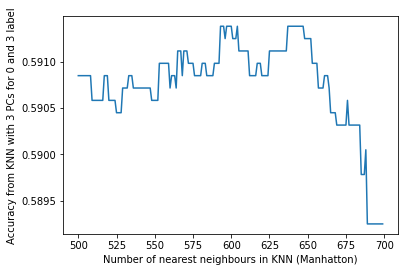

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_nn, scores)
plt.xlabel("Number of nearest neighbours in KNN (Manhatton)")
plt.ylabel("Accuracy from KNN with 3 PCs for 0 and 3 label")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=640, metric="manhattan", n_jobs=-1)
knn.fit(X_train_03_pca, y_train_03.ravel())

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=640)

In [ ]:

predicted_result = knn.predict(X_test_03_pca)
accuracy_chart = dict()
accuracy_chart['x00'] = 0
accuracy_chart['x01'] = 0
accuracy_chart['x10'] = 0
accuracy_chart['x11'] = 0
for i, value in enumerate(predicted_result):
  real_value = str(int(y_test_03.ravel()[i]))
  predicted_value = str(int(value))
  accuracy_chart['x%s%s'%(real_value, predicted_value)] += 1


In [ ]:
print(accuracy_chart)

{'x00': 4171, 'x01': 63, 'x10': 3000, 'x11': 262}


#### Visualise the PCA separation for index_flick and index_bend

In [ ]:
# plot_path = os.path.join(os.path.dirname(pca_path),'PCA_kernal_1.html')

print(X_test_03_pca.shape, y_test_03.shape)
df = pd.DataFrame(np.hstack((X_test_03_pca,y_test_03.reshape(-1,1))), columns=["PC1", "PC2", "PC3","label"])

fig = px.scatter_3d(df, x="PC1", y="PC2", z="PC3", color="label")
fig.update_traces(marker=dict(size=2,
                              line=dict(width=0.1)),
                  selector=dict(mode='markers'))
# fig.write_html(plot_path)
fig.show()


# Combination of the two models

## Setup lda model and distinguish index_bend/index_flick with shoot and middle flick

In [ ]:

lda_1 = LinearDiscriminantAnalysis(n_components=2, solver="svd")
lda_1.fit(X_train_reshaped, y_train_mix_label.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LinearDiscriminantAnalysis(n_components=2)

In [ ]:
X_test_mix_label_lda = lda_1.transform(X_test_reshaped)
X_train_mix_label_lda = lda_1.transform(X_train_reshaped)

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=500, metric="manhattan", n_jobs=-1)
knn_1.fit(X_train_mix_label_lda, y_train_mix_label.ravel())

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=500)

## Setup PCA mode and distinguish index_bend and index_flick

In [ ]:

pca_2 = PCA(n_components=3)
pca_2.fit(X_train_03)

X_test_03_pca = pca_2.transform(X_test_03)
X_train_03_pca = pca_2.transform(X_train_03)

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=500, metric="manhattan", n_jobs=-1)
knn_2.fit(X_train_03_pca, y_train_03.ravel())

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=500)

## Calculate the accuracy

In [ ]:
X_test_lda_1 = lda_1.transform(X_test_reshaped)
y_test_knn_1 = knn_1.predict(X_test_lda_1)
print(y_test_knn_1.shape)

index_0_3 = np.where(y_test_knn_1 == 0)
X_test_2 = X_test_reshaped[index_0_3,:]
X_test_pca_2 = pca_2.transform(X_test_2)
y_test_knn_2 = knn_2.predict(X_test_pca_2)
print(y_test_knn_2.shape)

for i, _ in enumerate(y_test_knn_2):
  y_test_knn_1[index_0_3[i]] = y_test_knn_2[i]

(13898,)


In [ ]:
total_num = y_test.shape[0]
correct_prediction = np.sum(y_test_knn_1 == y_test.ravel())
print('Accuracy is ', correct_prediction/total_num)

Accuracy is  0.7557922003165923


# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=300,min_impurity_decrease=0.1)

decision_tree.fit(X_train_lda, y_train.ravel())

DecisionTreeClassifier(min_impurity_decrease=0.1, min_samples_leaf=300)

In [ ]:
score = decision_tree.score(X_test_lda, y_test.ravel())
print("The accuracy of decision tree is ", score)

The accuracy of decision tree is  0.9596437517394935


In [ ]:
scores = []
num_sample_leaf = range(1,500,10)

for i in num_sample_leaf:
    decision_tree = DecisionTreeClassifier(min_impurity_decrease=0.1, min_samples_leaf=i)
    decision_tree.fit(X_train_lda, y_train.ravel())#     knn = KNeighborsClassifier(n_neighbors=i, weights="distance", metric="chebyshev", n_jobs=-1)
    scores.append(decision_tree.score(X_test_lda, y_test.ravel()))

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_sample_leaf, scores)
plt.xlabel("num_sample_leaf in decision tree")
plt.ylabel("Accuracy with 3 LDA PCs")

In [ ]:
model_folder = os.path.join(google_drive, 'ML', 'models', 'P72')
tree_path = os.path.join(model_folder,'decision_tree')
with open(tree_path, 'wb') as file:
    # Call load method to deserialze
    dataset = pickle.dump(decision_tree,file)

### Visualise the result

In [ ]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("delete_me") 

In [ ]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree, out_file=None, 
                            feature_names=['PC1','PC2','PC3'],  
                            class_names=['bend_index','shoot','middle_flick','index_flick'],  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
# model_folder = os.path.join(google_drive, 'ML', 'models', 'P72')
# tree_path = os.path.join(model_folder,'decision_tree')
plot_path = os.path.join(os.path.dirname(tree_path),'tree_probability_training_data.html')
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
mesh_size = 0.5
margin = 2

# We will use the iris data, which is included in px

df_train = pd.DataFrame(np.hstack((X_train_lda, y_train)),
                        columns=['pc1','pc2','pc3','label'])
df_test = pd.DataFrame(np.hstack((X_test_lda, y_test)),
                        columns=['pc1','pc2','pc3','label'])
df = df_train
# Create a mesh grid on which we will run our model
pc1_min, pc1_max = df.pc1.min() - margin, df.pc1.max() + margin
pc2_min, pc2_max = df.pc2.min() - margin, df.pc2.max() + margin
pc3_min, pc3_max = df.pc3.min() - margin, df.pc3.max() + margin
pc1range = np.arange(pc1_min, pc1_max, mesh_size)
pc2range = np.arange(pc2_min, pc2_max, mesh_size)
pc3range = np.arange(pc3_min, pc3_max, mesh_size)

ll, ww, hh = np.meshgrid(pc1range, pc2range, pc3range)

# Create classifier, run predictions on grid

Z = decision_tree.predict(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
Z = Z.reshape(ll.shape)
proba = decision_tree.predict_proba(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
proba = proba.reshape(ll.shape + (4,))
# Compute the confidence, which is the difference

diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))


fig = go.Figure(data=[go.Scatter3d(
    x=df_test.pc1,
    y=df_test.pc2,
    z=df_test.pc3,
    mode='markers',
    marker=dict(
        size=2,
        color=df_test.label,               # set color to an array/list of desired values
        line=dict(width=0.1),
        colorscale=['Blue','Red','Green','Orange'],   # choose a colorscale
    )
)])


df_mesh = pd.DataFrame(np.c_[ll.ravel(), ww.ravel(), hh.ravel(),diff.ravel()], columns=['ll','ww','hh','label'])



fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,0].ravel(),
        opacity=0.05,
        surface_count=25,
        colorscale='Blues',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,1].ravel(),
        opacity=0.05,
        surface_count=25,
        colorscale='Reds',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,2].ravel(),
        opacity=0.05,
        surface_count=25,
        colorscale='Greens',
        
    )
)


fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,3].ravel(),
        opacity=0.05,
        surface_count=25,
        colorscale='Oranges',
        
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)
fig.write_html(plot_path)
fig.show()

## Use decision tree on 100 PCs

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train_reshaped)

PCA(n_components=3)

In [ ]:
X_train_pca = pca.transform(X_train_reshaped)
X_test_pca = pca.transform(X_test_reshaped)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=100,min_impurity_decrease=0.1)

decision_tree.fit(X_train_pca, y_train.ravel())

DecisionTreeClassifier(min_impurity_decrease=0.1, min_samples_leaf=100)

In [ ]:
print(X_train_pca.shape)
print(decision_tree.score(X_test_pca, y_test))

(28590, 99)
0.8838681824722981


In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree, out_file=None, 
                            class_names=['bend_index','shoot','middle_flick','index_flick'],  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
scores = []
num_leaves = range(2,300)
# lda = LinearDiscriminantAnalysis(n_components=3, solver="svd")
# lda.fit(X_train_reshaped, y_train.ravel())
# X_test_lda= lda.transform(X_test_reshaped)
# X_train_lda = lda.transform(X_train_reshaped)

for i in num_leaves:
    decision_tree = DecisionTreeClassifier(min_samples_leaf=i,min_impurity_decrease=0.1)
    decision_tree.fit(X_train_pca, y_train.ravel())
    scores.append(knn.score(X_test_pca, y_test.ravel()))

The maximum score is  0.8810620233127069


Text(0, 0.5, 'Accuracy with 3 PCs')

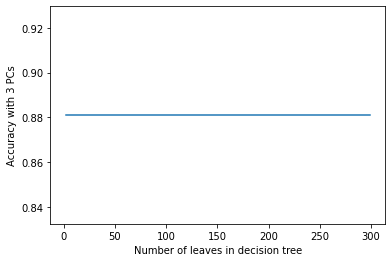

In [ ]:
print('The maximum score is ', max(scores))
plt.plot(num_leaves, scores)
plt.xlabel("Number of leaves in decision tree")
plt.ylabel("Accuracy with 3 PCs")

### Visualise decision tree

In [ ]:
# os.mkdir(os.path.join(google_drive, 'ML', 'models', 'P91'))
model_folder = os.path.join(google_drive, 'ML', 'models', 'P91')
tree_path = os.path.join(model_folder,'tree')
plot_path = os.path.join(os.path.dirname(tree_path),'tree_3pca.html')
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
mesh_size = 0.5
margin = 0

# We will use the iris data, which is included in px

df_train = pd.DataFrame(np.hstack((X_train_pca, y_train)),
                        columns=['pc1','pc2','pc3','label'])
df_test = pd.DataFrame(np.hstack((X_test_pca, y_test)),
                        columns=['pc1','pc2','pc3','label'])
df = df_train
# Create a mesh grid on which we will run our model
pc1_min, pc1_max = df.pc1.min() - margin, df.pc1.max() + margin
pc2_min, pc2_max = df.pc2.min() - margin, df.pc2.max() + margin
pc3_min, pc3_max = df.pc3.min() - margin, df.pc3.max() + margin
pc1range = np.arange(pc1_min, pc1_max, mesh_size)
pc2range = np.arange(pc2_min, pc2_max, mesh_size)
pc3range = np.arange(pc3_min, pc3_max, mesh_size)

ll, ww, hh = np.meshgrid(pc1range, pc2range, pc3range)

# Create classifier, run predictions on grid

Z = decision_tree.predict(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
Z = Z.reshape(ll.shape)
proba = decision_tree.predict_proba(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
proba = proba.reshape(ll.shape + (4,))
# Compute the confidence, which is the difference

diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))



fig = go.Figure(data=[go.Scatter3d(
    x=df_test.pc1,
    y=df_test.pc2,
    z=df_test.pc3,
    mode='markers',
    marker=dict(
        size=2,
        color=df_test.label,               # set color to an array/list of desired values
        line=dict(width=0.1),
        colorscale=['Blue','Red','Green','Orange'],   # choose a colorscale
    )
)])


df_mesh = pd.DataFrame(np.c_[ll.ravel(), ww.ravel(), hh.ravel(),diff.ravel()], columns=['ll','ww','hh','label'])

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,0].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Blues',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,1].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Reds',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,2].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Greens',
        
    )
)


fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,3].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Oranges',
        
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)
fig.write_html(plot_path)
fig.show()

## Use decision tree on 3 LDA components

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3, solver="svd")
lda.fit(X_train_reshaped, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LinearDiscriminantAnalysis(n_components=3)

In [ ]:
X_test_lda = lda.transform(X_test_reshaped)
X_train_lda = lda.transform(X_train_reshaped)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=100,min_impurity_decrease=0.1)

decision_tree.fit(X_train_lda, y_train.ravel())

DecisionTreeClassifier(min_impurity_decrease=0.1, min_samples_leaf=100)

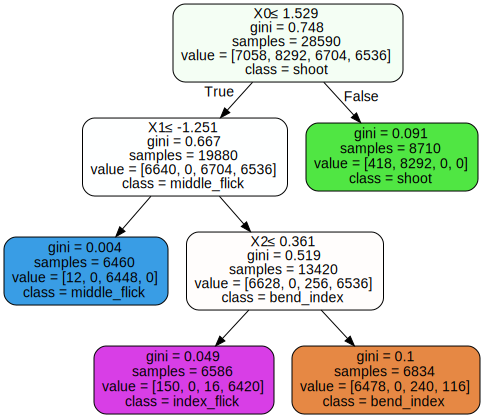

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree, out_file=None, 
                            class_names=['bend_index','shoot','middle_flick','index_flick'],  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
import numpy as np
x = [1,2,3,4,5,6,7,8]
y = np.array(x).reshape(4,2)
z = y.reshape(2,2,2)
t = z.reshape(4,2)
print(y, z,t)

[[1 2]
 [3 4]
 [5 6]
 [7 8]] [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] [[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [ ]:
# os.mkdir(os.path.join(google_drive, 'ML', 'models', 'P91'))
model_folder = os.path.join(google_drive, 'ML', 'models', 'P91')
tree_path = os.path.join(model_folder,'tree')
plot_path = os.path.join(os.path.dirname(tree_path),'tree_LDA.html')
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
mesh_size = 0.5
margin = 0

# We will use the iris data, which is included in px

df_train = pd.DataFrame(np.hstack((X_train_lda, y_train)),
                        columns=['pc1','pc2','pc3','label'])
df_test = pd.DataFrame(np.hstack((X_test_lda, y_test)),
                        columns=['pc1','pc2','pc3','label'])
df = df_train
# Create a mesh grid on which we will run our model
pc1_min, pc1_max = df.pc1.min() - margin, df.pc1.max() + margin
pc2_min, pc2_max = df.pc2.min() - margin, df.pc2.max() + margin
pc3_min, pc3_max = df.pc3.min() - margin, df.pc3.max() + margin
pc1range = np.arange(pc1_min, pc1_max, mesh_size)
pc2range = np.arange(pc2_min, pc2_max, mesh_size)
pc3range = np.arange(pc3_min, pc3_max, mesh_size)

ll, ww, hh = np.meshgrid(pc1range, pc2range, pc3range)

# Create classifier, run predictions on grid

Z = decision_tree.predict(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
Z = Z.reshape(ll.shape)
proba = decision_tree.predict_proba(np.c_[ll.ravel(), ww.ravel(), hh.ravel()])
proba = proba.reshape(ll.shape + (4,))
# Compute the confidence, which is the difference

diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))



fig = go.Figure(data=[go.Scatter3d(
    x=df_test.pc1,
    y=df_test.pc2,
    z=df_test.pc3,
    mode='markers',
    marker=dict(
        size=2,
        color=df_test.label,               # set color to an array/list of desired values
        line=dict(width=0.1),
        colorscale=['Blue','Red','Green','Orange'],   # choose a colorscale
    )
)])


df_mesh = pd.DataFrame(np.c_[ll.ravel(), ww.ravel(), hh.ravel(),diff.ravel()], columns=['ll','ww','hh','label'])

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,0].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Blues',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,1].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Reds',
        
    )
)

fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,2].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Greens',
        
    )
)


fig.add_trace(
    go.Volume(
        x=df_mesh.ll,
        y=df_mesh.ww,
        z=df_mesh.hh,
        value=proba[:,:,:,3].ravel(),
        opacity=0.1,
        surface_count=15,
        colorscale='Oranges',
        
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)
fig.write_html(plot_path)
fig.show()